In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import glob

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [26]:
from plotnine import ggplot, aes, geom_point, geom_histogram, geom_segment, xlim, labs

In [27]:
# Часть 1

In [28]:
# 1.1

In [29]:
names = glob.glob(r'data/*.csv')
wine_data = pd.concat([pd.read_csv(path, sep=';', decimal=',') for path in names])

In [30]:
wine_data.shape

(149908, 12)

In [31]:
# 1.2

In [32]:
repl_dict = {'а':'a','А':'A','о':'o','О':'O','е':'e','Е':'E'}
for key, value in repl_dict.items():
    wine_data['taster_name'] = wine_data['taster_name'].str.replace(key, value)

In [33]:
wine_data.drop_duplicates(inplace=True)
wine_data.shape

(119929, 12)

In [34]:
wine_data['taster_name'].nunique(dropna = False)

20

In [35]:
# 1.3, 1.4

In [36]:
wine_data = wine_data.fillna({'price': wine_data['price'].median()})

In [37]:
display(wine_data['points'].mean())
display(wine_data['points'].median())
display(wine_data['points'].std())

88.44214493575366

88.0

3.093274618268554

In [38]:
display(wine_data['price'].mean())
display(wine_data['price'].median())
display(wine_data['price'].std())

34.88263889467935

25.0

40.703298162136534

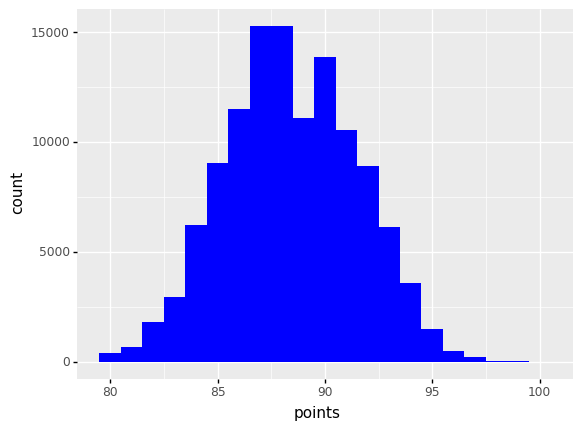

<ggplot: (-9223371958792959320)>

In [39]:
ggplot(wine_data) + aes(x='points') + geom_histogram(binwidth=1, fill='blue')

C:\Users\Richard\AppData\Roaming\Python\Python37\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 312 rows containing non-finite values.
C:\Users\Richard\AppData\Roaming\Python\Python37\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


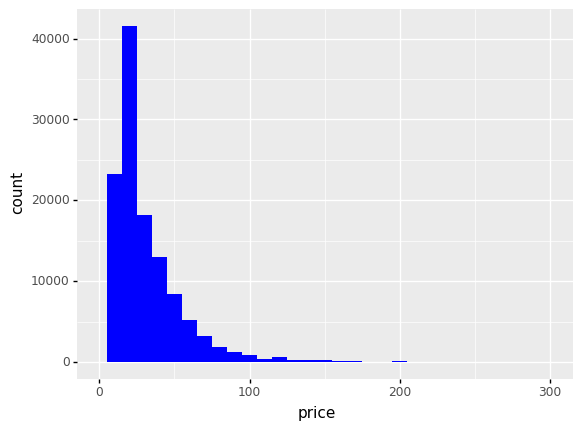

<ggplot: (-9223371958793010180)>

In [40]:
ggplot(wine_data) + aes(x='price') + geom_histogram(binwidth=10, fill='blue') + xlim(0,300)

In [41]:
# Распределение price имеет явную ассиметрию, имеются выбросы. Поэтому используем коэффициент корреляции Спирмена.
# Видим, что между переменными имеется слабаяположительная связь
sp.stats.spearmanr(wine_data['points'], wine_data['price'])

SpearmanrResult(correlation=0.5875133270165194, pvalue=0.0)

C:\Users\Richard\AppData\Roaming\Python\Python37\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 312 rows containing missing values.


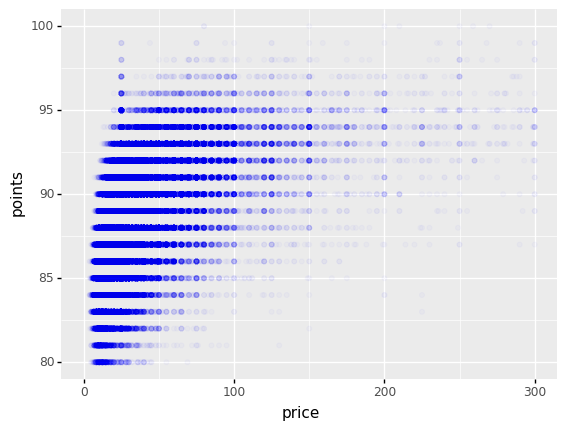

<ggplot: (-9223371958792996916)>

In [42]:
# Покажем связь переменных на графике
ggplot(wine_data) + aes(x='price', y='points') + xlim(0,300) + geom_point(alpha=0.02, color='blue')

In [43]:
# Для более наглядного отражения связи переменных, произведем небольшие преобразования данных
wine_data['price_log'] = wine_data['price'].apply(np.log)
wine_data['points_noise'] = wine_data['points'].apply(lambda x: np.random.uniform(-0.5, 0.5) + x)

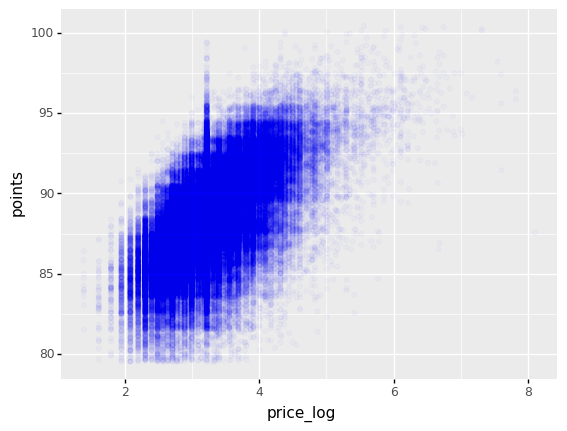

<ggplot: (-9223371958800113980)>

In [44]:
ggplot(wine_data) + aes(x='price_log', y='points_noise') + labs(y="points") + geom_point(alpha=0.02, color='blue')

In [45]:
# Часть 2

In [46]:
wine_data.head()

,entry_id,country,description,designation,points,price,province,region,taster_name,title,variety,winery,price_log,points_noise
0,119966,Argentina,Raspberry and cassis aromas are fresh and upri...,Pedernal,90,43.0,Other,San Juan,Michael Schachner,Finca Las Moras 2010 Pedernal Malbec (San Juan),Malbec,Finca Las Moras,3.761200,89.828200
1,119956,Argentina,Compared to the regular 2006 Malbec from Chaka...,Reserve,91,25.0,Mendoza Province,Luján de Cuyo,Michael Schachner,Chakana 2006 Reserve Malbec (Luján de Cuyo),Malbec,Chakana,3.218876,90.776722
2,119950,Argentina,Andeluna's top wines tend to be ripe and plump...,Pasionado,91,55.0,Mendoza Province,Uco Valley,Michael Schachner,Andeluna 2004 Pasionado Red (Uco Valley),Red Blend,Andeluna,4.007333,90.914940
3,119943,Argentina,"A lively, well-made blend of Tempranillo, Malb...",B Crux,91,24.0,Mendoza Province,Uco Valley,Michael Schachner,O. Fournier 2005 B Crux Red (Uco Valley),Red Blend,O. Fournier,3.178054,90.979789
4,119939,Argentina,There is a select group of under-$20 Malbecs f...,La Madras Vineyard,91,18.0,Mendoza Province,Mendoza,Michael Schachner,Ricardo Santos 2006 La Madras Vineyard Malbec ...,Malbec,Ricardo Santos,2.890372,90.662784


In [47]:
# 2.1

In [48]:
top5_df = wine_data.groupby(['taster_name'], as_index=False).aggregate({'entry_id': 'count'})\
.rename(columns={'entry_id' : 'count'}).sort_values(['count'], ascending=False).head()

In [49]:
# Топ-5 самых продуктивных авторов
top5_df.head(5)

,taster_name,count
15,Roger Voss,23558
12,Michael Schachner,14039
9,Kerin O’Keefe,9697
14,Paul Gregutt,8867
18,Virginie Boone,8708


In [50]:
# 2.2

In [51]:
top5_df_countries1 = top5_df.merge(wine_data, on=['taster_name'], how='left').groupby(['taster_name','country'], as_index=True)\
.size().to_frame('count').query('count > 1').sort_values(['taster_name', 'count'], ascending=[True, False])

In [52]:
# Выводим данные о странах и количестве отзывов по этим странам авторов из Топ-5 в виде таблицы
top5_df_countries1

count
taster_name       country            
Kerin O’Keefe     Italy          9697
Michael Schachner Spain          6046
                  Chile          4049
                  Argentina      3542
                  Uruguay          98
                  Italy            76
                  US               71
                  Mexico           63
                  Brazil           49
                  France           20
                  Peru             16
                  Portugal          9
Paul Gregutt      US             8666
                  Canada          159
                  France           34
                  Italy             4
                  Spain             4
Roger Voss        France        17150
                  Portugal       5223
                  Austria        1064
                  Italy            96
                  South Africa     22
                  US                2
Virginie Boone    US             8708

In [53]:
top5_df_countries = top5_df.merge(wine_data, on=['taster_name'], how='left').groupby(['taster_name','country'], as_index=False)\
.size().query('size > 1').sort_values(['taster_name', 'size'], ascending=[True, False]).reset_index().drop(['index'], axis=1)

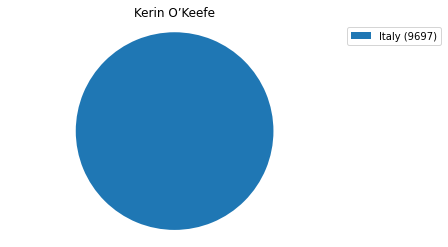

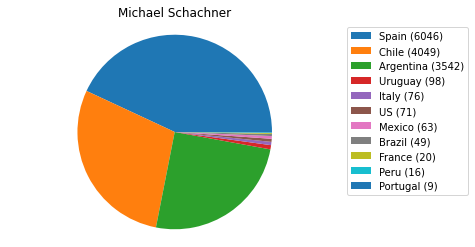

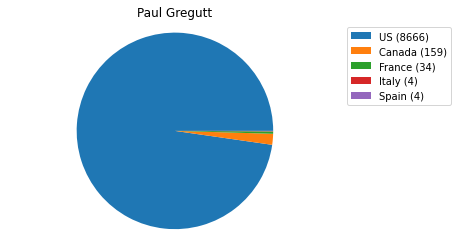

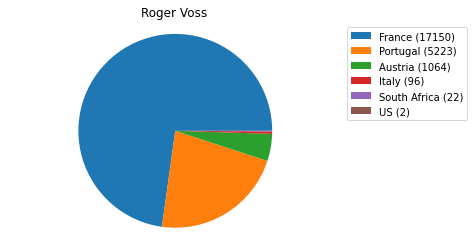

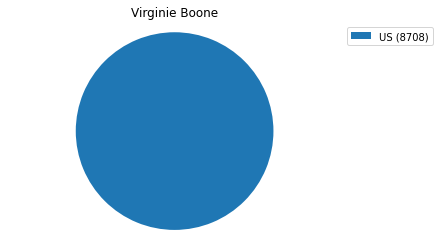

In [54]:
# Выводим данные о странах и количестве отзывов по этим странам авторов из Топ-5 в виде круговой диаграммы
def draw_pie(cur_taster, labels, vals):
    fig, ax = plt.subplots()
    ax.set_title(cur_taster)
    ax.pie(vals)
    ax.axis('equal')
    labels2 = [f"{l} ({v})" for l,v in zip(labels, vals)]
    ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), labels=labels2)
    
cur_taster = top5_df_countries.iloc[0]['taster_name']
vals = []
labels = []
for i in range(len(top5_df_countries)):
    if (top5_df_countries.iloc[i]['taster_name'] != cur_taster) | (i == len(top5_df_countries)-1):
        df = pd.DataFrame({'count': vals, 'country': labels})
        draw_pie(cur_taster, labels, vals)
        vals.clear()
        labels.clear()
        cur_taster = top5_df_countries.iloc[i]['taster_name']
    labels.append(top5_df_countries.iloc[i]['country'])
    vals.append(top5_df_countries.iloc[i]['size'])
draw_pie(cur_taster, labels, vals)

In [55]:
# 2.3

In [56]:
top5_df_prices = top5_df.merge(wine_data, on=['taster_name'], how='inner')[['taster_name', 'price']]

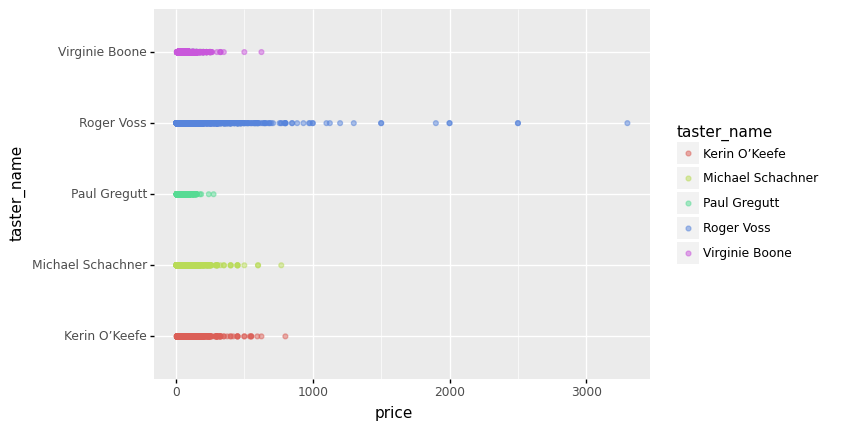

<ggplot: (-9223371958793350596)>

In [57]:
# Если нужно проанализировать не только диапазон но и то, на каком участке диапазона было больше или меньше отзывов,
# строим точечную диаграмму
ggplot(top5_df_prices) + aes(x='price', y='taster_name', color='taster_name') + geom_point(alpha=0.5)

In [58]:
# Если нужно проанализировать только сам диапазон, можно построить диаграмму Ганта
top5_df_min_max = top5_df_prices.copy()
top5_df_min_max['price_min'] = top5_df_min_max['price']
top5_df_min_max['price_max'] = top5_df_min_max['price']
top5_df_min_max = top5_df_min_max.groupby(['taster_name'], as_index=False).aggregate({'price_min': 'min', 'price_max': 'max'})

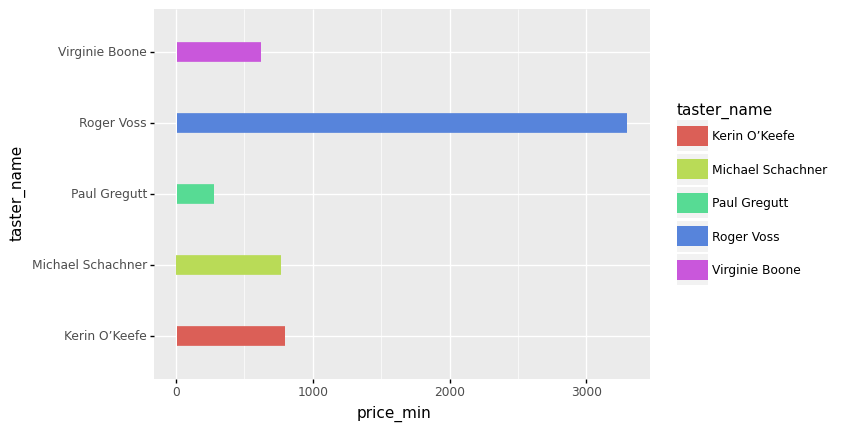

<ggplot: (-9223371958793316824)>

In [59]:
ggplot(top5_df_min_max, aes(x='price_min', xend='price_max', y='taster_name', yend='taster_name', color='taster_name')) + geom_segment(size=8)

In [60]:
# Дополнительно

In [61]:
# Мы уже увидели, что имеется некоторая связь между оценкой и ценой. Посмотрим, что ещё может влиять на рейтинг.
# Можно предположить, что рейтинг зависит от сорта вина или от страны, в которой производится вино.

In [62]:
# Анализируя данные, видим, что связь между сортом вина и рейтингом действительно имеется.
wine_data.groupby(['variety'], as_index=False).aggregate({'points': 'mean', 'entry_id': 'count'})\
.rename(columns={'points' : 'mean', 'entry_id': 'count'}).query('count > 10').sort_values(['mean'], ascending=False)

,variety,mean,count
419,Picolit,91.153846,26
578,Tannat-Cabernet Franc,90.928571,14
615,Tokaji,90.750000,24
577,Tannat-Cabernet,90.571429,28
505,Sangiovese Grosso,90.563218,696
...,...,...,...
205,Garnacha-Syrah,84.500000,12
531,Seyval Blanc,84.200000,15
391,Norton,84.000000,16
66,Brachetto,83.714286,14


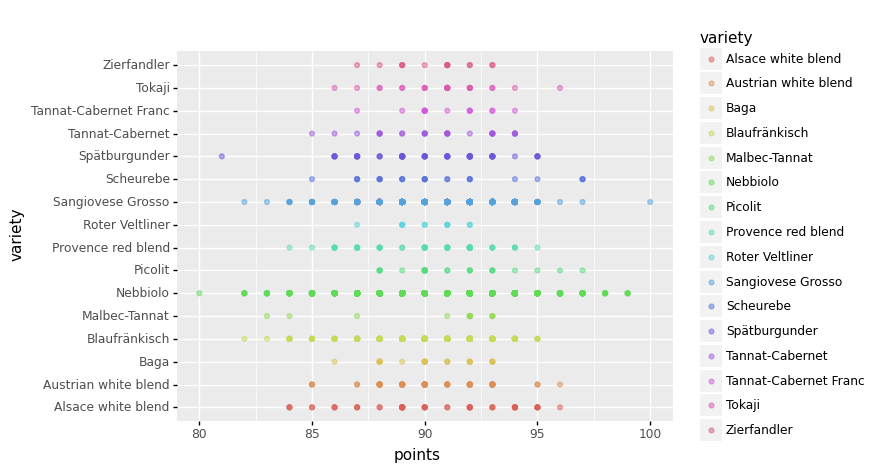

<ggplot: (-9223371958793351280)>

In [63]:
# В то же время, анализируя следующий график для сортов вин со средним рейтингом выше 90, видим, что разброс достаточно большой,
# т.е. на основании лишь сорта нельзя однозначно сказать, что оценка будет высокой.
varieties = wine_data.groupby(['variety'], as_index=False).aggregate({'points': 'mean', 'entry_id': 'count'})\
.rename(columns={'points' : 'mean', 'entry_id': 'count'}).query('count > 10 & mean >= 90').sort_values(['mean'], ascending=False)
varieties = varieties.merge(wine_data, on=['variety'], how='inner')[['variety', 'points']]
ggplot(varieties) + aes(x='points', y='variety', color='variety') + geom_point(alpha=0.5)

In [64]:
# Так же видим, что имеется связь между рейтингом и страной происхождения вина.
wine_data.groupby(['country'], as_index=False).aggregate({'points': 'mean', 'entry_id': 'count'})\
.rename(columns={'points' : 'mean', 'entry_id': 'count'}).sort_values(['mean'], ascending=False)

,country,mean,count
14,England,91.746032,63
20,India,90.250000,8
3,Austria,90.129532,3034
17,Germany,89.895582,1992
7,Canada,89.309735,226
19,Hungary,89.294574,129
9,China,89.000000,1
15,France,88.866752,20353
24,Luxembourg,88.800000,5
28,Morocco,88.708333,24


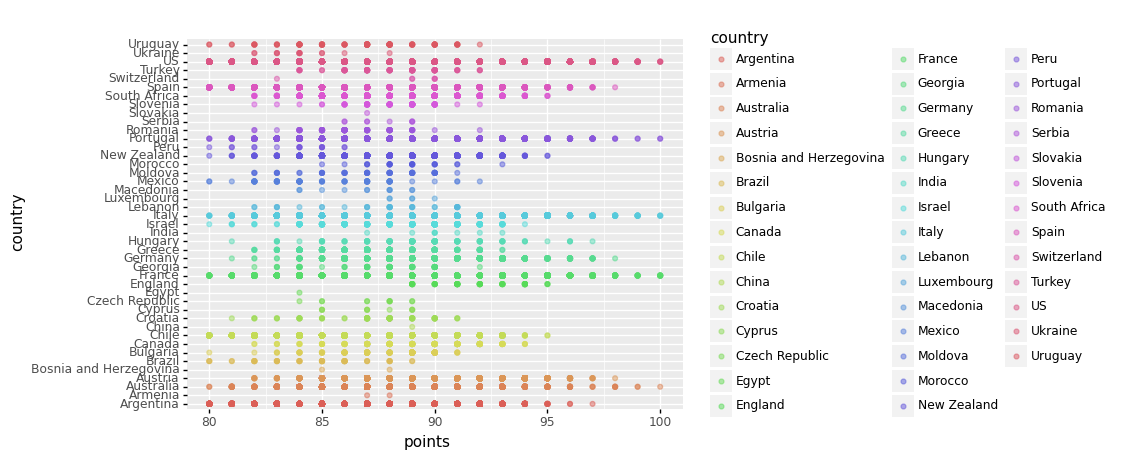

<ggplot: (-9223371958793314768)>

In [65]:
# Проанализировав следующий график, видим, что, например, английское вино стабильно получает высокие оценки,
# в то время как, например, вина из Румынии, Мексики и Бразилии как правило имеют рейтинг ниже 90.
# Но в то же время рейтинг, например, американских и португальских вин имеет довольно сильный разброс,
# и сложно по одной лишь стране предсказать рейтинг.
ggplot(wine_data) + aes(x='points', y='country', color='country') + geom_point(alpha=0.5)

In [66]:
wine_data = wine_data.fillna({'region': 'Not'})
wine_data = wine_data.fillna({'designation': 'Not'})
wine_data = wine_data.fillna({'variety': 'Not'})

In [67]:
# Если нужно получить более явную связь, то стоит сузить поиск до провинции, региона или, лучше всего, до винодельни:
wine_data.groupby(['winery'], as_index=False).aggregate({'points': 'mean', 'entry_id': 'count'})\
.rename(columns={'points' : 'mean', 'entry_id': 'count'}).query('count > 10 & mean >= 90').sort_values(['mean'], ascending=False)

,winery,mean,count
16320,Wayfarer,95.333333,18
8589,Horsepower,95.090909,11
3928,Château Pontet-Canet,95.000000,13
7765,Gaja,94.894737,19
3461,Château Haut-Brion,94.700000,20
...,...,...,...
3094,Château Brown,90.000000,15
1218,Besserat de Bellefon,90.000000,19
5048,Conceito Vinhos,90.000000,20
4864,Clos Solène,90.000000,12


In [68]:
# Здесь, например, видим, что у винодельни с лучшим средним рейтингом оценка вообще не опускается ниже 93.
wine_data.query('winery == "Wayfarer"').sort_values(['points'], ascending=False)

,entry_id,country,description,designation,points,price,province,region,taster_name,title,variety,winery,price_log,points_noise
60697,4488,US,"Structured, with years to go to take on added ...",The Traveler,98,155.0,California,Fort Ross-Seaview,Virginie Boone,Wayfarer 2014 The Traveler Pinot Noir (Fort Ro...,Pinot Noir,Wayfarer,5.043425,98.277337
34508,55036,US,This is yet another stunning wine from this si...,Wayfarer Vineyard,98,80.0,California,Fort Ross-Seaview,Virginie Boone,Wayfarer 2014 Wayfarer Vineyard Chardonnay (Fo...,Chardonnay,Wayfarer,4.382027,97.898592
38974,46598,US,From an estate block planted to a mysterious s...,The Traveler,97,150.0,California,Fort Ross-Seaview,Virginie Boone,Wayfarer 2012 The Traveler Pinot Noir (Fort Ro...,Pinot Noir,Wayfarer,5.010635,96.724249
60695,4491,US,"Dark, brooding cinnamon and fleshy black plum ...",Golden Mean,97,115.0,California,Fort Ross-Seaview,Virginie Boone,Wayfarer 2014 Golden Mean Pinot Noir (Fort Ros...,Pinot Noir,Wayfarer,4.744932,97.094000
60692,4493,US,"Youthfully flippant, this block of the Wayfare...",Mother Rock,96,115.0,California,Fort Ross-Seaview,Virginie Boone,Wayfarer 2014 Mother Rock Pinot Noir (Fort Ros...,Pinot Noir,Wayfarer,4.744932,96.265439
60690,4495,US,Floral in aromas and yet darkly savory in cher...,Paige's Ridge,96,115.0,California,Fort Ross-Seaview,Virginie Boone,Wayfarer 2014 Paige's Ridge Pinot Noir (Fort R...,Pinot Noir,Wayfarer,4.744932,96.364722
38969,46602,US,Crafted from estate-grown fruit—a marriage of ...,Golden Mean,96,115.0,California,Fort Ross-Seaview,Virginie Boone,Wayfarer 2012 Golden Mean Pinot Noir (Fort Ros...,Pinot Noir,Wayfarer,4.744932,95.761833
18314,85985,US,This marks another stellar vintage of The Trav...,Estate Grown The Traveler,96,150.0,California,Fort Ross-Seaview,Virginie Boone,Wayfarer 2013 Estate Grown The Traveler Pinot ...,Pinot Noir,Wayfarer,5.010635,96.023442
36414,51331,US,"A high-acid, weighty and complex white, this v...",Wayfarer Vineyard,95,80.0,California,Fort Ross-Seaview,Virginie Boone,Wayfarer 2013 Wayfarer Vineyard Chardonnay (Fo...,Chardonnay,Wayfarer,4.382027,94.594424
38962,46610,US,"Brooding in dark cherry and earthy spice, this...",Mother Rock,95,115.0,California,Fort Ross-Seaview,Virginie Boone,Wayfarer 2012 Mother Rock Pinot Noir (Fort Ros...,Pinot Noir,Wayfarer,4.744932,95.115357
